# Q-Learner

**Overview**  
Q-learning is a reinforcement learning technique. The goal is to learn the optimal policy. It is model free meaning that it doesn't need the entire environment to run. Q-learning involves an agent and an environment. The environment is a set of states S, and a set of actions A that are allowed in each state. The agent will reside in a state and perform an action. The environment will process that action and return back the new state (could be the same) and the reward for that action. The goal of the agent is to find the optimal policy with the largest reward. Just like with the MDPs in the previous notebook, the agent calculates the maximum future reward.  

**Chris Watkins**  
In 1989, Chris Watkins ([Link](http://www.cs.rhul.ac.uk/~chrisw/)) as a Cambridge graduate student created Q-Learning. He started looking at what Richard Sutton was doing with reinforcement learning. While doing research he came up with a new algorithm which was dubbed "Q-learning". This new algorithm didn't need the models to learn optimal control like an MDP.

**Learning Rate**: The learning rate, or $\alpha$, is a value between 0 and 1. It determines how aggressively you update the table value. With a learning rate near 0 you will not update your table value much. With the learning rate near 1 you are almost replacing the current value with the new calculated value. Basically, you ignore most of what you had learned for what you picked up this time. Typically, this is around 0.1.

**Explore/Exploit**: Imagine a baby that is trying to learn how to accomplish a task. At first they are just a tornado of arms and legs flailing about. But, given enough time they figure out what they need to accomplish. The flailing about is the exploring part and the part where they know what to do is exploiting their knowledge.  
  
A major part of the q-learning agent is whether to explore the environment or exploit the environment. Initially, everything is exploring as the agent hasn't learned anything about the environment (in most implementations this is done by setting the initial values of all the actions within the state to a random number). When the agent starts training you will need to determine how much of the time do you take random actions and how much of the time do you take the optimal action. If you explore for too long you won't learn the optimal policy because all of your actions will be random and if you exploit too much you have the possibility of never finding the optimal solution. This process is called *epsilon-greedy* where epsilon is the percent of time the agent chooses to explore. In most problems the ideal explore rate is 10%. There are some algorithms that have this value decay over time to take advantage of your training.  

**Discount Factor**: As stated in the MDP section, The discount factor is between 0 and 1. This determines how much you want to give the future path credit. You need to balance out your immediate rewards versus your future rewards. The higher the discount factor the further into the future path you want to include in this state/action pair. I will record the same math here as before to help this make sense. If your discount factor is 0.8 and after 5 steps you get a reward of 4 the present value of that reward is $0.8^4 * 5$ or ~2. If you change the discount factor or 0.9 that value becomes ~3.2. 0.1 turns into 0.0005.
  
**Q Table**: In a standard Q-learning algorithm the agent holds a q table that it uses to determine the ideal action for each state. This table is S x A in size. For each state we store the reward for each action. Typically, this is done as a 2 dimensional array but you can use other data structures. Also, in deep learning the q table is a neural network.  

**Algorithm**  
$$Q'(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha * \big( r_t + \gamma * max_a Q(s_{t+1},a) - Q(s_t,a_t) \big) $$  
  
$\alpha$: This is the learning rate. As listed above, this determines how much you change your Q value.  
$Q(s_t,a_t)$: This is the old Q value from the table.  
$r_t$: Is the reward you are receiving for taking action $a_t$ in state $s_t$  
$\gamma$: This is the discount factor similar to the MDP   
$max_aQ(s_{t+1},a)$: This is the maximum future reward from state $s_{t+1}$.  
$Q(s_t,a_t)$: This is the old Q value

---
**Question 1**  
A simple question to make sure you understand where all the pieces fit together.  
First, the hyper parameters.  
&nbsp;&nbsp;&nbsp;&nbsp;Your learning rate ($\alpha$) is 0.1  
&nbsp;&nbsp;&nbsp;&nbsp;Your discount rate ($\gamma$\) is 0.8.  
You are in state S1 and taking action A1 to state S2 and getting the reward of 5.  
What is the new Q[S1,A1] value assuming this following Q table?  

| |A1|A2|A3|  
|----------|----------|----------|---------|  
|S1|0.1|0.2|0.3|
|S2|0.4|0.5|0.6|  
|S3|0.7|0.8|0.9|  
|S4|0.11|0.12|0.13|  

In [2]:
from qlearning import QLQuestion1 #Import solution file
QLQuestion1(0.1) #Pass in an integer value

Incorrect.
  The old value is 0.1
  The learning rate (alpha) is 0.1
  The reward is 5
  The discount factor (gamma) is 0.8
  The max action from state S2 is A3 with a value of 0.6
  0.1 + 0.1 * (5 + 0.8 * 0.6 - 0.1)


One thing I wanted to point out was finding $max_aQ(s_{t+1},a)$ in the previous question as it was hard for me to figure out until I did a few examples. In our problem we are looking at $max_a Q(S2,a)$. When we look at state S2 we see that we have 3 values, 0.4, 0.5, and 0.6. Clearly, the largest is under action A3. So, the $max_a$ in this case is A3. Now, we don't care which column it is from or care what action is taken. We just need the max expected value.

**Discrete/Continuous Environments**

A discrete environment is when you have a certain number of states. This can be anything from 1 up to a managable amount. If you have to have a supercomputer in order to store your Q table it isn't discrete. A continuous environment is more like the real world. You wouldn't be able to list the states in a simple action like walking across the room let alone a complex simulation.  

If you want to still use a q-learner in a continuous state you have to use something called *discretization*. This is where you group the continuous states into discrete ranges. If you have seen a histogram you have seen discretization. When you break up the data into bins you are essentially making all the data fit into a discrete number of bars.  

The simplest way to discretize a continuous space is to split the states into buckets. If you environment has 1 million states you could break them up into states of 10,000.  

If you have a more complex environment you could break them into buckets based on how similar their task is to complete. For example, in soccer, if you are on the left side of the field you need to go to the right to get to the goal. If you are on the right you need to go left to get to the goal. You could split that into 2 states. Now, granted, that is terrible and would never work but you get the idea.  

To get beyond discretization in continuous spaces and foreshadow future notebooks, you can use function approximation. Function approximation is something that is actually named correctly. You are asking for a function that will approximate the target function. In this world, Neural Networks are an example. We will see them when we get into deep learning.

## Q-Learning in a Discrete Environment

In [3]:
#Import the libraries
import gym
from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Create custom frozen lake without the stochastic movements
#NOTE: This can only be ran ONCE. After that it will error out
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)

In the following section I am going to have you create a Q-learner and have it go against an OpenAI environment called [FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/). It is a 4x4 grid that has stochastic movements as well as holes that will end your game. But, for this question I am going to remove the stochastic movements at first. The reward for hitting the bottom right state is 1 while falling in a hole is 0. The goal is to start in the top left state and make it to the bottom right state without falling into the holes.  

The environment looks like this:  
SFFF  
FHFH  
FFFH  
HFFG  
  
S : starting point, safe  
F : frozen surface, safe  
H : hole, fall to your doom  
G : goal, where the frisbee is located  

Actions:  
0 : Left  
1 : Down  
2 : Right  
3 : Up  

In [22]:
#Create the Environment
envFrozenNoSlip = gym.make('FrozenLakeNotSlippery-v0')

[2018-10-31 22:29:15,469] Making new env: FrozenLakeNotSlippery-v0


We are going to look at the actions (action_space) and the size of the environment (observation_space)

In [68]:
observations = envFrozenNoSlip.reset()
actions = envFrozenNoSlip.action_space
states = envFrozenNoSlip.observation_space
env.close()
print(actions)
print(states)

Discrete(4)
Discrete(16)


We can see there are 4 actions (Left, Down, Right, Up) and there are 16 states (4x4 grid world).  

Now, I want you to fill in the following code to implement a Q-learner. I have done most of it but I want you to create the formula. Remember, you need to recreate this:  

$$Q'(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha * \big( r_t + \gamma * max_a Q(s_{t+1},a) - Q(s_t,a_t) \big) $$  

If you can't get it to work run the next section of code and it will print the equation that I used. You shouldn't have to alter any of the hyper parameters (alpha, gamma, epsilon, or epsilon decay)

In [8]:
#Create a method that will be the Q-learner
def convertDirection(q_val): #Convert the action int to a direction
    if q_val == 0: return 'L'
    if q_val == 1: return 'D'
    if q_val == 2: return 'R'
    if q_val == 3: return 'U'
    return '?'


def q_learning(env, alpha=0.1, gamma=0.9,  epsilon=0.99, epsilon_decay=0.99999):
    nS = env.observation_space.n #Number of States
    nA = env.action_space.n #Number of Actions
    Q = np.zeros((nS,nA), dtype=np.float) #Initialize the Q table to all 0s
    for e in range(10000): #Run 10k training runs
        state = env.reset() #Part of OpenAI where you need to reset at the start of each run
        total_reward = 0 #Set initial reward to 0
        while True: #Loop until done == True
            #IF random number is less than epsilon grab the random action else grab the argument max of Q[state]
            action = env.action_space.sample() if np.random.random() < epsilon else np.argmax(Q[state])
            nstate, reward, done, infor = env.step(action) #Send your action to OpenAI and get back the tuple
            total_reward += reward #Increment your reward
            #Q Function Update
            #(not done) keeps the terminal state as 0
            ######################################
            ###                                ### 
            ### TODO: Implement this equations ###
            ###                                ###
            #This should take the form of:
            #  Q[state][action] += [Add Learning Rate] * ([Add Q Update Code] * (not done) - Q[state][action])
            Q[state][action] += 0
            ######################################
            state = nstate
            if epsilon > 0.10: epsilon *= epsilon_decay #Make sure to keep random at 10%
            if done:
                break
    pi = np.argmax(Q, axis=1) #Optimal Policy
    return pi,Q

pi, Q = q_learning(envFrozenNoSlip) #Return the optimal policy and the Q table results

print('Here is your policy')
print('%s | %s | %s | %s' % (convertDirection(pi[0]),convertDirection(pi[1]),convertDirection(pi[2]),convertDirection(pi[3])))
print('%s | %s | %s | %s' % (convertDirection(pi[4]),convertDirection(pi[5]),convertDirection(pi[6]),convertDirection(pi[7])))
print('%s | %s | %s | %s' % (convertDirection(pi[8]),convertDirection(pi[9]),convertDirection(pi[10]),convertDirection(pi[11])))
print('%s | %s | %s | %s' % (convertDirection(pi[12]),convertDirection(pi[13]),convertDirection(pi[14]),convertDirection(pi[15])))
print('')
print('Optimal Policy')
print('D | R | D | L')
print('D | L | D | L')
print('R | D | D | L')
print('L | R | R | L')
print('')
print('Q Table Values')
print(Q)

Here is your policy
D | R | D | L
D | L | D | L
R | D | D | L
L | R | R | L

Optimal Policy
D | R | D | L
D | L | D | L
R | D | D | L
L | R | R | L

Q Table Values
[[ 0.531441  0.59049   0.59049   0.531441]
 [ 0.531441  0.        0.6561    0.59049 ]
 [ 0.59049   0.729     0.59049   0.6561  ]
 [ 0.6561    0.        0.59049   0.59049 ]
 [ 0.59049   0.6561    0.        0.531441]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.81      0.        0.6561  ]
 [ 0.        0.        0.        0.      ]
 [ 0.6561    0.        0.729     0.59049 ]
 [ 0.6561    0.81      0.81      0.      ]
 [ 0.729     0.9       0.        0.729   ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.81      0.9       0.729   ]
 [ 0.81      0.9       1.        0.81    ]
 [ 0.        0.        0.        0.      ]]


In [7]:
#Run this code if you want the equation that I used
from qlearning import QLSolution1 #Import solution file
QLSolution1()

Here is my solution
  Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])


A few things to note:  
* If your policy matched the optimal policy you have a successful Q-learner
* When you look at the Q table you should see 0s for each of the holes
* If I turn the slippery feature back on you would have a different Q table since you would get rewarded for moving away from the holes

## Q-Learning in a Continuous Environment

In [23]:
#Create the Environment
envCartPole = gym.make('CartPole-v1')

[2018-10-31 22:29:24,193] Making new env: CartPole-v1


For the continuous environment we will use the [CartPole](https://gym.openai.com/envs/CartPole-v1/) environment from OpenAI.  

The actions are 0 to push the cart to the left and 1 to push the cart to the right.  

The continuous state space is an X coordinate for location, the velocity of the cart, the angle of the pole, and the velocity at the tip of the pole. The X coordinate goes from -4.8 to +4.8, velocity is -Inf to +Inf, angle of the pole goes from -24 degrees to +24 degrees, tip velocity is -Inf to +Inf. With all of the possible combinations you can see why we can't create a Q table for each one.  

To "solve" this puzzle you have to have an average reward of > 195 over 100 consecutive episodes

The first thing I am going to look at is the state space returned:

In [10]:
start = envCartPole.reset()
print('Here is the starting tuple with the 4 continuous variables:')
print(start)

Here is the starting tuple with the 4 continuous variables:
[-0.02297549 -0.00417755  0.03849977 -0.03147342]


I am going to try and explore the state space to get an idea of what we have for possible combinations. I have listed the ranges above but this will give us some real combinations.  

One thing to note, since we are trying to use the FULL environment I need to make sure I am not just pushing and pulling in the center location.  

I am going to loop through 1,000 episodes in the attempt to get a nice sample space of variables in the state space. The idea for this code comes from [Miquel Morales](https://github.com/mimoralea/applied-reinforcement-learning/) who created a compliment to the GT Reinforcement Learning class. If you want a more thorough analysis and more complex topics aourn RL in general check out his repository.

In [11]:
observations = []
for episode in range(1000): #1k episodes should give us enough data
    observation = envCartPole.reset()
    for step in range(100): #Do only 100 steps per episode unless we finish
        observations.append(observation)
        action = envCartPole.action_space.sample()
        if episode < 25: #First 20 episodes only go left
            action = 0
        elif episode < 50: #Next 20 episodes only go right
            action = 1
        observation, reward, done, info = envCartPole.step(action)
        if done: #Fell or hit the goal
            break
envCartPole.close()
x_vals = np.array(observations)[:,0]
xd_vals = np.array(observations)[:,1]
a_vals = np.array(observations)[:,2]
ad_vals = np.array(observations)[:,3]
y = np.zeros_like(x_vals)

We will now plot each of these variables to see their range in our sample.

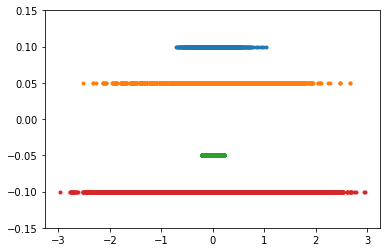

In [12]:
plt.plot(x_vals, y + 0.10, '.') # X Coordinate
plt.plot(xd_vals, y + 0.05, '.') # Cart Velocity
plt.plot(a_vals, y - 0.05, '.') # Pole Angle
plt.plot(ad_vals, y - 0.10, '.') # Pole tip velocity

plt.ylim([-0.15, 0.15])
plt.show()

Using the graph above you can see the range of the X coordinate to range from about -1 to 1. In OpenAI's GitHub, it is stated that this number should range from -4.8 to 4.8. Why do you think we didn't get that? Hopefully, you see that with our random action generation that we never held the pole up long enough to reach the edge. You would have to have a fairly functional learner to keep the pole balanced long enough to reach the edge.  
  
Here are the actual thresholds from the environemnt

In [13]:
print(envCartPole.env.observation_space.low)
print(envCartPole.env.observation_space.high)

x_thres = ((envCartPole.env.observation_space.low/2)[0],
           (envCartPole.env.observation_space.high/2)[0])
a_thres = ((envCartPole.env.observation_space.low/2)[2],
           (envCartPole.env.observation_space.high/2)[2])

[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]
[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]


**Discretization**

Since we have the common variables from our little test application we can go ahead and start to box these values up into groups that we can make discrete. To do this we can use the numpy method *linspace* that will return evenly spaced numbers.  

Here I will do the grouping for the X coordinate

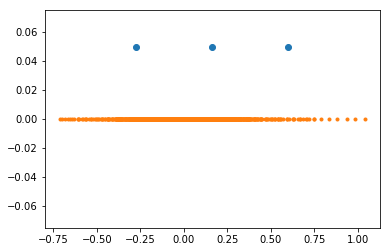

In [14]:
x1 = np.linspace(np.min(x_vals), np.max(x_vals),
                 4, endpoint=False)[1:]
y1 = np.zeros(len(x1)) + 0.05

plt.ylim([-0.075, 0.075])
plt.plot(x1, y1, 'o')
plt.plot(x_vals, y, '.')
plt.show()

Here is the X velocity variable

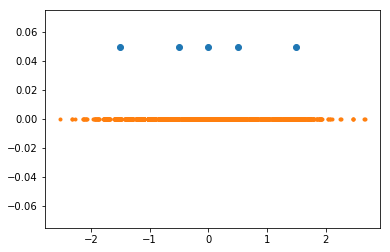

In [15]:
xd1 = np.sort(np.append(np.linspace(-1.5,1.5,4,endpoint=True),0))
y1 = np.zeros(len(xd1)) + 0.05

plt.ylim([-0.075,0.075])
plt.plot(xd1, y1, 'o')
plt.plot(xd_vals, y, '.')
plt.show()

Here is the pole angle variable

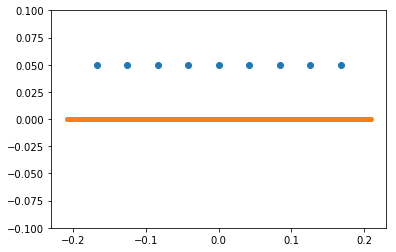

In [16]:
a1 = np.sort(np.linspace(a_thres[0], a_thres[1],
                         10, endpoint=False)[1:])
y1 = np.zeros(len(a1)) + 0.05

plt.ylim([-0.1, 0.1])
plt.plot(a1, y1, 'o')
plt.plot(a_vals, y, '.')
plt.show()

Here is the pole tip velocity

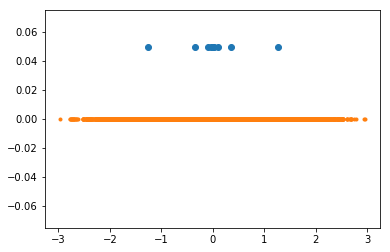

In [17]:
all_vals = np.sort(np.append(
    (np.logspace(-7, 4, 6, endpoint=False, base=2)[1:],
    -np.logspace(-7, 4, 6, endpoint=False, base=2)[1:]), 0))
idxs = np.where(np.abs(all_vals) < 2)
ad1 = all_vals[idxs]
y1 = np.zeros(len(ad1)) + 0.05

plt.ylim([-0.075, 0.075])
plt.plot(ad1, y1, 'o')
plt.plot(ad_vals, y, '.')
plt.show()

In [18]:
x1

array([-0.2732234 ,  0.16379566,  0.60081473])

Here we will use the *digitize* method to determine which bucket the X coordinate would fall into. Before you run this code try and guess.

In [20]:
print(np.digitize(-.7, x1))
print(np.digitize(-0.25, x1))
print(np.digitize(0, x1))
print(np.digitize(0.17, x1))
print(np.digitize(5, x1))

0
1
1
2
3


This gives you an idea how we can group the X coordinates based on the buckets we created.  

Here are all the buckets in a single graph to give you an idea of our Q table.

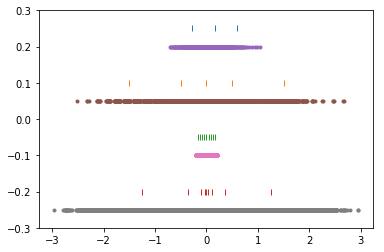

In [21]:
yx1 = np.zeros_like(x1) + 0.25
yx = np.zeros_like(x_vals) + 0.20
yxd1 = np.zeros_like(xd1) + 0.10
yxd = np.zeros_like(xd_vals) + 0.05
ya1 = np.zeros_like(a1) - 0.05
ya = np.zeros_like(a_vals) - 0.10
yad1 = np.zeros_like(ad1) - 0.20
yad = np.zeros_like(ad_vals) - 0.25

plt.ylim([-0.3, 0.3])

plt.plot(x1, yx1, '|')
plt.plot(xd1, yxd1, '|')
plt.plot(a1, ya1, '|')
plt.plot(ad1, yad1, '|')

plt.plot(x_vals, yx, '.')
plt.plot(xd_vals, yxd, '.')
plt.plot(a_vals, ya, '.')
plt.plot(ad_vals, yad, '.')
plt.show()

Now, knowing how we are going to turn our continous environment into a discrete Q table we can move forward with creating the Q-learning algorithm. It will be very similar to the previous one. In most of my tests I was able to beat the environment around 4k episodes. Run this as is first to get a gauge of where it is at and then update *learning_schedule* and *action_selection* to try and beat my scores. Either with fewer episodes or higher max values.

### The following 3 method can be updated to change the functionality of the Q-Learner algorithm. Update these to try and solve the environment in less episodes or reach a higher maximum value.

In [27]:
#Rate at which we set the learning rate. Typically, I keep this constant but much smarter people than myself
#have altered this value. Either by burning it down each episode or doing a step down where they keep the
#value constant for X episodes and then drop it.
def learning_schedule(e, max_episode):
    return 0.8

In [48]:
#Action selection AKA explore/exploit. Much like the learning rate this can either burn down or step down
def action_selection(state, Q, e, max_episodes):
    #0-1k: 100% explore
    #1k-2k: 80%
    #2k-3k: 75%
    #3k-4k: 50%
    #4k-5k: 0%
    if e < 1000:
        epsilon = 0.99
    elif e < 2000:
        epsilon = 0.50
    elif e < 3000:
        epsilon = 0.25
    elif e < 4000:
        epsilon = 0.05
    else:
        epsilon = 0
    action = np.random.randint(Q.shape[1]) if np.random.random() < epsilon else np.argmax(Q[state])
    return action

This is a copy of what was created above for the buckets but I recreated it here to make it easier to change them in a single spot.

In [35]:
def build_buckets():
    observations = []
    for episode in range(1000): #1k episodes should give us enough data
        observation = envCartPole.reset()
        for step in range(100): #Do only 100 steps per episode unless we finish
            observations.append(observation)
            action = envCartPole.action_space.sample()
            if episode < 25: #First 20 episodes only go left
                action = 0
            elif episode < 50: #Next 20 episodes only go right
                action = 1
            observation, reward, done, info = envCartPole.step(action)
            if done: #Fell or hit the goal
                break
    envCartPole.close()
    x_vals_loc = np.array(observations)[:,0]
    xd_vals_loc = np.array(observations)[:,1]
    a_vals_loc = np.array(observations)[:,2]
    ad_vals_loc = np.array(observations)[:,3]
    y = np.zeros_like(x_vals_loc)

    x_thres_loc = ((envCartPole.env.observation_space.low/2)[0],
           (envCartPole.env.observation_space.high/2)[0])
    a_thres_loc = ((envCartPole.env.observation_space.low/2)[2],
           (envCartPole.env.observation_space.high/2)[2])

    x1_loc = np.linspace(np.min(x_vals_loc), np.max(x_vals_loc), 4, endpoint=False)[1:]
    xd1_loc = np.sort(np.append(np.linspace(-1.5,1.5,4,endpoint=True),0))
    a1_loc = np.sort(np.linspace(a_thres_loc[0], a_thres_loc[1],10, endpoint=False)[1:])
    all_vals_loc = np.sort(np.append(
        (np.logspace(-7, 4, 6, endpoint=False, base=2)[1:],
         -np.logspace(-7, 4, 6, endpoint=False, base=2)[1:]), 0))
    idxs_loc = np.where(np.abs(all_vals_loc) < 2)
    ad1_loc = all_vals[idxs_loc]

    return (x1_loc, xd1_loc, a1_loc, ad1_loc)

Here is the method that will convert the 4 observations (X coordinate for location, the velocity of the cart, the angle of the pole, and the velocity at the tip of the pole) into a single state in the Q table. It grabs the bin for each of the 4 observations and then concatenate them into a string.  

For example, if the X coordinate is 0.04 and that is bin 1, x velocity is 0.02 and that is bin 2, angle is 0.02 and that is bin 1, and tip velocity is 0.04 and that is bin 6 it will get converted to Q table index 1216.  

To use the previous example, we knew the state space of the FrozenLake was 8 spaces so we could just use the index 1 through 8 to find the Q table location. Since we don't have that we can ensure we have enough space by putting the first observations (X coord) as the 1000s digit, second observations (x velocity) as the 100s digit, third observations (angle) as the 10s digit, and the fourth observations (tip velocity) as the 1s digit. This adds some bloat if you have less than 10 bins per state but this makes the math easy.

In [26]:
def observation_to_state(observation, bucket):
    disc_state = []
    for i in range(len(observation)):
        disc_state.append(int(np.digitize(observation[i], bins=bucket[i])))
    state = int(''.join(map(lambda feature: str(int(feature)), disc_state)))
    return state

Here is the Q-Learning algorithm

In [30]:
def q_learning_continuous(env, buckets):
    gamma = 0.99
    rewards = []    

    nS = 10 * 10 * 10 * 10 #I have 4 observations so I need 4 bits
    nA = envCartPole.action_space.n
    Q = np.random.random((nS,nA)) #Initialize the Q table to all random numbers
    episodes = 5000
    for e in range(episodes):
        observation = env.reset()
        state = observation_to_state(observation, buckets)
        total_reward = 0
        while True:
            action = action_selection(state, Q, e, episodes) #Grab the action
            observation, reward, done, infor = env.step(action)
            nstate = observation_to_state(observation,buckets)
            total_reward += reward

            alpha = learning_schedule(e,episodes)

            #Q Function Update
            #(not done) keeps the terminal state as 0
            Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])
            state = nstate
            
            if done:
                rewards.append(total_reward) #Keep track of the total rewards per episode
                break
    return Q, rewards

Here is the calling code

In [49]:
buckets = build_buckets() #Create the buckets
Q, rewards = q_learning_continuous(envCartPole, buckets)
envCartPole.close()
print(Q) #Here is the Q table. It will only print part of it but it shows the 2 actions per state

[[  3.68353705e-01   2.92530785e-01]
 [  2.10400205e+00   1.24882295e+00]
 [  3.61226890e+01   2.83976793e-01]
 ..., 
 [  1.76355422e-02   2.15045229e-02]
 [  6.50677724e-01   3.90119308e-01]
 [  5.72524984e-02   7.03251481e-01]]


Here we wil graph the results. Hopefully, you will see the rolling averge break the red "goal" line. One thing to note is look how the rolling average changes based on your epsilon and alpha changes.

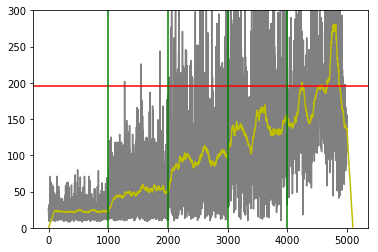

In [51]:
rolling_average = np.convolve(rewards, np.ones(100)/100)

plt.plot(rewards, color='grey')
plt.plot(rolling_average, color='y')
plt.axhline(y=195, color='r', linestyle='-') #Solved Line
#NOTE: These are the epsilon changes in my original code
plt.axvline(x=1000, color='g', linestyle='-')
plt.axvline(x=2000, color='g', linestyle='-')
plt.axvline(x=3000, color='g', linestyle='-')
plt.axvline(x=4000, color='g', linestyle='-')
plt.ylim( (0,300) )
plt.show()

That is all for now. After this notebook we are on to Double Q Learning